In [2]:
import tensorflow as tf
import numpy as np
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [3]:
data_dir = "../SKRIPSI-GIAL/data"

In [4]:
train_dir = data_dir+'/train'
val_dir = data_dir+'/val' 
test_dir = data_dir+'/test'
os.listdir(train_dir)

['cataract', 'normal']

In [5]:
class_name = os.listdir(train_dir)
class_name

['cataract', 'normal']

In [6]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    brightness_range=(0.8,1.2), 
                    zoom_range=(0.5,1.0), 
                    fill_mode='nearest', 
                    )
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(150,150), 
    batch_size=32, 
    class_mode='binary'
)

val_generator = validation_datagen.flow_from_directory(
    val_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=32,
    shuffle=False,
    class_mode='binary'
)

Found 746 images belonging to 2 classes.
Found 106 images belonging to 2 classes.
Found 214 images belonging to 2 classes.


In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=[150, 150, 3]),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

In [9]:
model.compile(
optimizer='adam',
loss='binary_crossentropy',
metrics=['accuracy']
)

In [10]:
hasil = model.fit(train_generator, epochs=15, validation_data=val_generator)

Epoch 1/15
24/24 [==============================] - 36s 1s/step - loss: 0.7971 - accuracy: 0.5603 - val_loss: 0.6434 - val_accuracy: 0.7358
Epoch 2/15
24/24 [==============================] - 32s 1s/step - loss: 0.5939 - accuracy: 0.6957 - val_loss: 0.5244 - val_accuracy: 0.7453
Epoch 3/15
24/24 [==============================] - 36s 1s/step - loss: 0.5461 - accuracy: 0.7145 - val_loss: 0.6118 - val_accuracy: 0.6981
Epoch 4/15
24/24 [==============================] - 35s 1s/step - loss: 0.5303 - accuracy: 0.7292 - val_loss: 0.4240 - val_accuracy: 0.8113
Epoch 5/15
24/24 [==============================] - 34s 1s/step - loss: 0.5209 - accuracy: 0.7359 - val_loss: 0.4412 - val_accuracy: 0.8491
Epoch 6/15
24/24 [==============================] - 35s 1s/step - loss: 0.4357 - accuracy: 0.7802 - val_loss: 0.3991 - val_accuracy: 0.8208
Epoch 7/15
24/24 [==============================] - 34s 1s/step - loss: 0.4283 - accuracy: 0.8016 - val_loss: 0.3820 - val_accuracy: 0.8113
Epoch 8/15
24/24 [==

In [11]:
test_evaluate = model.evaluate(test_generator)

print(f'Test loss     : {test_evaluate[0]}')
print(f'Test accuracy : {round(test_evaluate[1],2)}')

7/7 [==============================] - 5s 828ms/step - loss: 0.4062 - accuracy: 0.8692
Test loss     : 0.40616485476493835
Test accuracy : 0.87


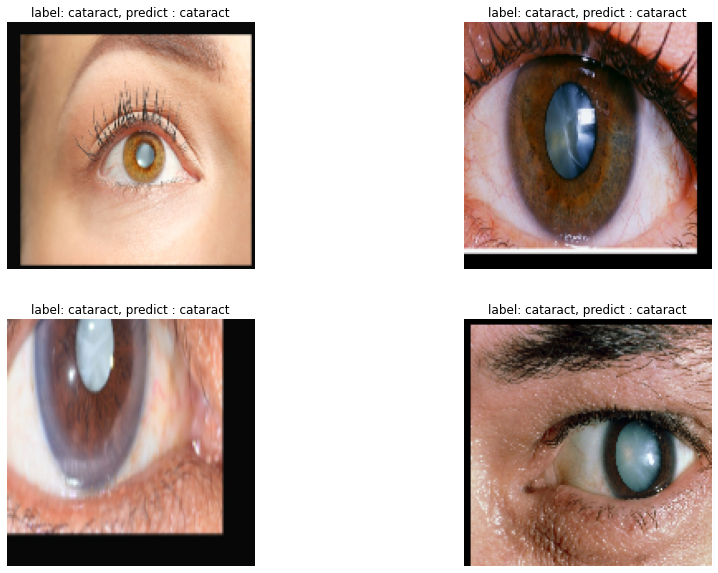

In [12]:
image ,label = next(iter(test_generator))

plt.figure(figsize=(15,10))
for i in range(4) :
    TrueLabel = class_name[np.argmax(label[i])]
    plt.subplot(2,2,i+1)
    plt.axis('off')
    y_pred = np.argmax(model.predict(image[i][None,...],verbose=0))
    plt.imshow(tf.squeeze(image[i]))
    plt.title(f'label: {TrueLabel}, predict : {class_name[y_pred]}')

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib

In [14]:
y_test = []
y_pred = []

for i in range(len(test_generator)) :
    x,y = test_generator.next()
    for j in range(len(y)) :
        y_test.append(class_name[np.argmax(y[j])])
        y_pred.append(class_name[np.argmax(model.predict(x[j][None,...],verbose=0))])

In [15]:
y_test

['cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',

In [16]:
y_pred

['cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',

In [17]:
cm = confusion_matrix(y_test, y_pred)

c:\Users\muham\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


c:\Users\muham\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


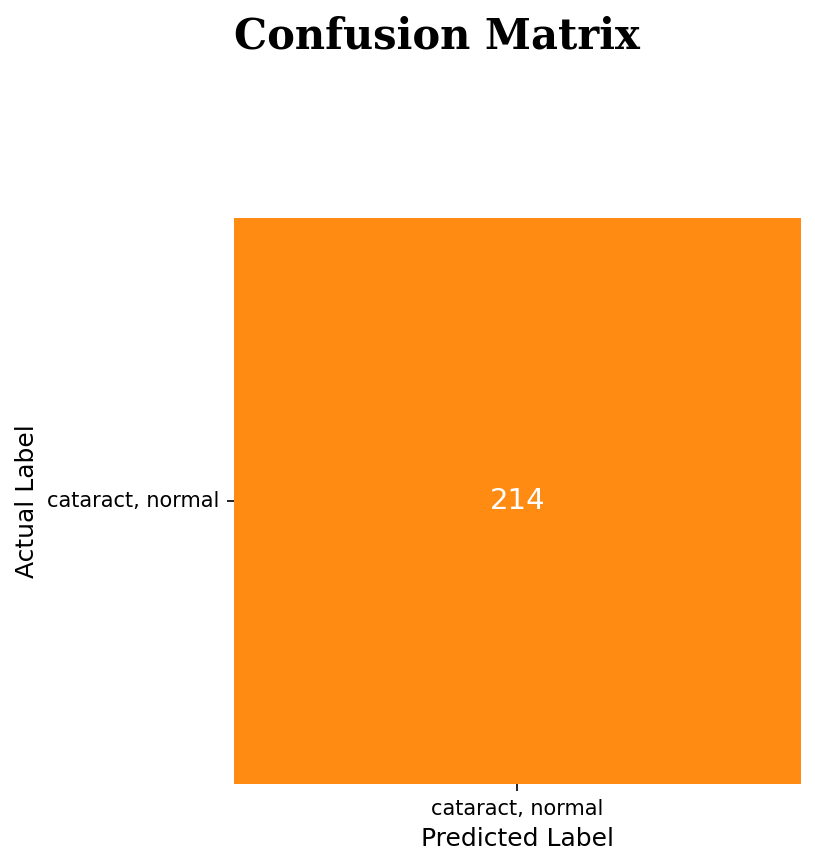

In [18]:
fig, ax = plt.subplots(figsize=(5, 5),dpi=150)
cm = confusion_matrix(y_test, y_pred)

colors = ["#393E46","#393E46"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)


ax.text(0,-0.3,'Confusion Matrix ',fontfamily='serif',fontsize=20,fontweight='bold')
sns.heatmap(ax=ax, data=cm,
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False,linewidth=1.5, annot=True,cmap=colormap, 
            annot_kws={"fontsize":14},fmt='')
ax.set_xticklabels(['cataract, normal'])
ax.set_yticklabels(['cataract, normal'])
plt.yticks(rotation=0)

ax.set_ylabel("Actual Label",fontsize=12)
ax.set_xlabel("Predicted Label",fontsize=12)

from matplotlib.patches import Rectangle
for i in range(0,10):
    ax.add_patch(Rectangle((i, i), 1, 1, fill=True,color="#FF8B13"))

plt.show()